In [247]:
!pip3 uninstall statsmodels
!pip3 install numpy scipy patsy pandas
!pip3 install statsmodels


Found existing installation: statsmodels 0.13.1
Uninstalling statsmodels-0.13.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.13.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.13.1
  Using cached statsmodels-0.13.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


In [248]:
!pip install patsy
import statsmodels.api as sm

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

from sklearn.preprocessing import StandardScaler
from datetime import timedelta

In [250]:
url = 'https://raw.githubusercontent.com/Sai-Kumar-Gorre/Web-and-Mobile/main/us_state_vaccinations%204.csv'
df = pd.read_csv(url)

In [251]:
df.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN


In [252]:
df.columns
df['date'] = pd.to_datetime(df['date'])

df = df.drop([ 'total_distributed','total_vaccinations'
       'people_vaccinated', 'people_fully_vaccinated_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred','daily_vaccinations_raw', 'daily_vaccinations', 'daily_vaccinations_per_million', 'share_doses_used'], axis=1)




In [253]:
df = df.drop([ 'total_distributed','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'distributed_per_hundred','daily_vaccinations_raw', 'daily_vaccinations', 'daily_vaccinations_per_million', 'share_doses_used'], axis=1)

In [254]:
df.head

<bound method NDFrame.head of             date  ... people_vaccinated_per_hundred
0     2021-01-12  ...                          1.45
1     2021-01-13  ...                          1.53
2     2021-01-14  ...                          1.64
3     2021-01-15  ...                          1.77
4     2021-01-16  ...                           NaN
...          ...  ...                           ...
18779 2021-10-31  ...                         50.85
18780 2021-11-01  ...                         50.86
18781 2021-11-02  ...                         51.09
18782 2021-11-03  ...                         51.17
18783 2021-11-04  ...                         51.20

[18784 rows x 4 columns]>

In [255]:
df_missouri = df[df['location']=='Missouri']

In [256]:
df_missouri.head

<bound method NDFrame.head of            date  ... people_vaccinated_per_hundred
9530 2021-01-12  ...                          1.76
9531 2021-01-13  ...                          1.76
9532 2021-01-14  ...                          2.37
9533 2021-01-15  ...                          2.50
9534 2021-01-16  ...                           NaN
...         ...  ...                           ...
9820 2021-10-31  ...                         56.93
9821 2021-11-01  ...                         56.94
9822 2021-11-02  ...                         56.98
9823 2021-11-03  ...                         57.03
9824 2021-11-04  ...                         57.10

[295 rows x 4 columns]>

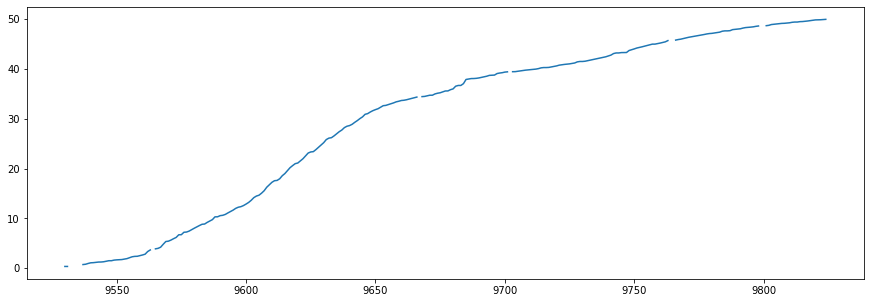

In [257]:
df_missouri['people_fully_vaccinated_per_hundred'].plot()

In [258]:
# Dataset
data = df_missouri['people_fully_vaccinated_per_hundred'].values.reshape(-1,1)

In [259]:
data = df_missouri['people_fully_vaccinated_per_hundred'].values.reshape(-1,1)
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [260]:
model = ARIMA(data, order=(25,1,0))
model = model.fit()

In [261]:
# Number of days in the future to forecast
num_days = 90

In [263]:
# Forecast total vaccinations for next 90 days
results = model.predict(start=data.size, end=data.size+num_days-1, dunamic=True)
results = scaler.inverse_transform(results.reshape(-1, 1))

In [264]:
start_date = df_missouri['date'].values[-1]
start_date = np.datetime64(start_date) + np.timedelta64(1,'D')
start_date = pd.to_datetime(str(start_date))
start_date = start_date.strftime('%Y-%m-%d')

In [265]:
rng = pd.date_range(start_date, periods=90, freq='D')
date_frame = pd.DataFrame({ 'Date': rng}) 

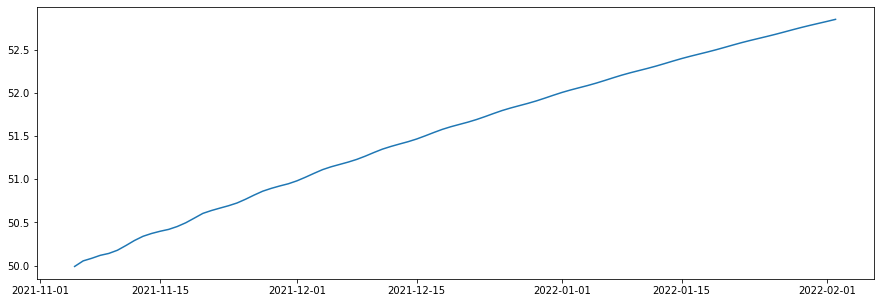

In [266]:
plt.plot(date_frame,results)

In [268]:

results_frame = pd.DataFrame(results, columns= ['results'])
frame = [date_frame["Date"], results_frame["results"]]
headers = ["date_frame", "results_frame"]

final_df = pd.concat(frame, axis=1, keys=headers)
final_df.to_csv('missouri.csv')

